# Chunking using custom syntactic rules to extract meaningful descriptions


In [3]:
import nltk
import pandas as pd
import numpy as np

# Read in corpus

In [4]:
from nltk.tokenize import word_tokenize

filename= "C:\\Users\\Tayla\\Documents\\2nd Semester 2020\\Final Project\\10.Oct.Method\\Sepsis\\Sep_all_clean.txt"
      
with open(filename,'r',encoding='utf-8') as file:
    corp=file.readlines()

texts = []
for sentence in corp:
    texts.append(sentence)
#print(texts)
#print(texts.index('her current condition she is diabetic she is dementia she is hypertention hyperthyroidism  total knee replacement yes so he blood sugars are quite stable in the morning it was seven point something but after her vomiting it went down to twelve and I am not sure what was the latest one done but everything she is had has come up she cannot keep anything in she needs to be hospitalised for drips\n'))

# Splitting text into POS

In [15]:
tagged =[]



for sentence in texts:
# POS tagging with nltk
    nltk_pos_tagged = nltk.pos_tag(sentence.split())
    tagged.append(nltk_pos_tagged)

print(len(tagged))

data_frame = pd.DataFrame(tagged)
#data_frame
#print(tagged)

361


In [6]:
def preprocess(doc):
    sentences = nltk.sent_tokenize(doc)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences


# Chunking according to rules set 

Example: 
Sentence from corpus: Okay Bye-bye good afternoon I am from I have got a resident 80 years old with a diabetes she is just had a setback now doctors here he thinks it is some kind of a bug so he wants her to go to hospital immediately 

Syntax tree: 


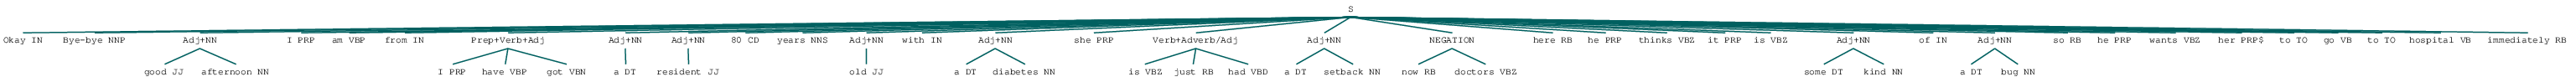

In [7]:
# Grammar Rules

grammar =  """ Prep+Verb+Adj:  {<PRP|DT|NN>?<VB.*|MD><VB.*|JJ*>}
             Verb+Adverb/Adj:  {<VB.*|MD><RB|JJ|VB.?><VB.*|JJ*>}
                    
                   
                      Adj+NN: {<JJ|DT><NN.*>*}
                         GER: {<VBG>}
                    NEGATION: {<RB|NNS><JJ|VB.*>}"""

tagged_rule =[]
trees = []
chunk_trees = []
for index,sentence in enumerate(texts):
# POS tagging with nltk
    nltk_pos_tagged = nltk.pos_tag(sentence.split())
    tagged_rule.append(nltk_pos_tagged)
    
for each in range(len(tagged_rule)):
    cp = nltk.RegexpParser(grammar)
    chunk_trees.append(cp.parse(tagged_rule[each]))
    
    
data_frame_rule=pd.DataFrame(tagged_rule)

print('Example: ')
number_line = 26
print("Sentence from corpus: "+texts[number_line])

data_frame_rule 
print('Syntax tree: ')
display(chunk_trees[number_line])


In [8]:

NP = []
VP = []
PP = []
DN = []
NG = []
IN=[]
NN=[]

def getNodes(parent):

    for node in parent:
        if type(node) is nltk.Tree:
                
            if node.label() == 'Prep+Verb+Adj': 
                NP.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("NP: Sentence:", " ".join(node.leaves()))
                
            if node.label() == 'Verb+Adverb/Adj':
                VP.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                while "do not know" in VP: VP.remove("do not know")
                #print ("VP: Sentence:", " ".join(node.leaves()))
                
            if node.label() == 'Verb+Noun':
                PP.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("PP: Sentence:", " ".join(node.leaves()))
            if node.label() == 'PRP+VB+CC':
                DN.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("PP: Sentence:", " ".join(node.leaves()))
            if node.label() == 'Adj+NN':
                NG.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("PP: Sentence:", " ".join(node.leaves()))
            if node.label() == 'GER':
                IN.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("PP: Sentence:", " ".join(node.leaves()))
            if node.label() == 'NEGATION':
                NN.append(' '.join(''.join(elems[0]) for elems in node.leaves()))
                #print ("PP: Sentence:", " ".join(node.leaves()))


            getNodes(node)
        

In [9]:
for chunked in range(len(chunk_trees)):
    getNodes(chunk_trees[chunked])

In [10]:
print(texts[number_line])

NP_dataframe = pd.DataFrame(NP,  columns=['Prep+Verb+Adj'])
#NP_dataframe

VP_dataframe = pd.DataFrame(VP, columns=['Verb+Adverb/Adj'])
#VP_dataframe


PP_dataframe = pd.DataFrame(PP, columns=['Adj+Noun'])
#PP_dataframe


DN_dataframe = pd.DataFrame(DN, columns=['PRP+VB+CC'])
#DN_dataframe[0:30]

NG_dataframe = pd.DataFrame(NG, columns=['Adj+NN'])
#NG_dataframe[0:60]


IN_dataframe = pd.DataFrame(IN, columns=['GER'])
#IN_dataframe


NN_dataframe = pd.DataFrame(NN, columns=['Negation symptom'])
#IN_dataframe


Okay Bye-bye good afternoon I am from I have got a resident 80 years old with a diabetes she is just had a setback now doctors here he thinks it is some kind of a bug so he wants her to go to hospital immediately 



In [11]:
# Place the DataFrames side by side
horizontal_stack = pd.concat([NP_dataframe, VP_dataframe,PP_dataframe,DN_dataframe,NG_dataframe,IN_dataframe,NN_dataframe], axis=1)
print('Sepsis meaningful sentences:')
horizontal_stack[0:50]

Sepsis meaningful sentences:


,Prep+Verb+Adj,Verb+Adverb/Adj,Adj+Noun,PRP+VB+CC,Adj+NN,GER,Negation symptom
0,we have got,is maybe dehydrated,NaN,NaN,a lady,sleeping,now doctors
1,is vomiting,am not sure,NaN,NaN,a lot,vomiting,always have
2,you are speaking,is just had,NaN,NaN,no,vomiting,just take
3,that is right,is very pale,NaN,NaN,no,speaking,else sugar
4,you are speaking,are quite stable,NaN,NaN,no,talking,desperately ill
5,you are speaking,am not sure,NaN,NaN,a,vomiting,yes sir
6,wife must be,is very ill,NaN,NaN,private,walking,just got
7,be scanned,is very low,NaN,NaN,a,speaking,just phoned
8,She can sit,would rather have,NaN,NaN,private telecare service,coming,just spoke
9,she can walk,is quite ill,NaN,NaN,a call,going,just need


In [12]:
# Combining the meaningful sentences into one array
combined_sepsis = []

for sen in NP:
    combined_sepsis.append(sen)
    
for sen in VP:
    combined_sepsis.append(sen)

for sen in PP:
    combined_sepsis.append(sen)
    
for sen in DN:
    combined_sepsis.append(sen)
    
for sen in IN:
    combined_sepsis.append(sen)
#Removing "do not know" sentence from array
while "do not know" in combined_sepsis: combined_sepsis.remove("do not know")
while "" in combined_sepsis: combined_sepsis.remove("")
#print(combined_sepsis)


# Write 'meaningful' sentences to a txt file (for augmentation)

In [13]:
#numpy_array = NP_dataframe['Description'].to_numpy()
#np.savetxt(r"C:\Users\Tayla\Documents\2nd Semester 2020\Final Project\10.Oct.Method\Sepsis\Sepsis_meaningful.txt", numpy_array)


tfile = open("C:\\Users\\Tayla\\Documents\\2nd Semester 2020\\Final Project\\10.Oct.Method\\Sepsis\\Sepsis_meaningful.txt", 'a')
for each in range(len(combined_sepsis)):
    tfile.writelines(combined_sepsis[each]+'\n')
tfile.close()

# Creating 'file' format for classification model

In [14]:

tfile = open("C:\\Users\\Tayla\\Documents\\2nd Semester 2020\\Final Project\\10.Oct.Method\\Sepsis\\Sepsis_meaningful", 'a')
for each in range(len(combined_sepsis)):
    tfile.writelines(combined_sepsis[each]+'\n')
tfile.close()